### This notebook was provided by our course instructor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### **Importing Libraries**

In [ ]:
# Importing libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

sns.set(style='whitegrid', font_scale=1.2)

#### **Loading Data**

In [ ]:
# Loading the data
# df = pd.read_csv('/content/drive/MyDrive/HCI_project/data/extracted_data/all_overall_data_arranged.csv')
df = pd.read_csv('/content/drive/MyDrive/my_grad_HCI/HCI_project/data/extracted_data/all_overall_data_arranged.csv')
df = df.rename(columns={
    'Participant Code': 'participant_code',
    'Session Code': 'session_code',
    'Number of Targets': 'number_of_targets',
    'Condition Code': 'condition_code',
    'Hand Dominance': 'hand_dominance',
    'Mean Completion Time (ms)': 'mean_completion_time',
    'Mean Click Error (%)': 'mean_click_error',
    'Mean Throughput (bps)': 'mean_throughput'
})
df.drop(['Pointing Device','Device Experience'],axis=1, inplace=True)
df.head()

,participant_code,session_code,condition_code,hand_dominance,number_of_targets,mean_completion_time,mean_click_error,mean_throughput
0,P1,S1,C1,Dominant,15.0,1294.640000,6.666667,0.776320
1,P1,S2,C1,Dominant,15.0,1190.453333,0.000000,2.954818
2,P1,S3,C1,Dominant,15.0,1140.213333,6.666667,2.669788
3,P1,S1,C2,Non-Dominant,15.0,1453.080000,0.000000,2.410242
4,P1,S2,C2,Non-Dominant,15.0,1322.680000,0.000000,2.510909


#### **Visualizing Data**

In [ ]:
dom_df = df[df['hand_dominance'] == 'Dominant']
mean_completion_time = dom_df['mean_completion_time'].mean()
mean_click_error = dom_df['mean_click_error'].mean()

sd_completion_time = dom_df['mean_completion_time'].std()
sd_click_error = dom_df['mean_click_error'].std()

print('Dominant Hand')
print('mean_completion_time', mean_completion_time, 'mean_click_error', mean_click_error)
print('sd_completion_time', sd_completion_time, 'sd_click_error', sd_click_error)

non_dom_df = df[df['hand_dominance'] == 'Non-Dominant']
mean_completion_time = non_dom_df['mean_completion_time'].mean()
mean_click_error = non_dom_df['mean_click_error'].mean()

sd_completion_time = non_dom_df['mean_completion_time'].std()
sd_click_error = non_dom_df['mean_click_error'].std()

print('Non-Dominant Hand')
print('mean_completion_time', mean_completion_time, 'mean_click_error', mean_click_error)
print('sd_completion_time', sd_completion_time, 'sd_click_error', sd_click_error)

Dominant Hand
mean_completion_time 1198.866071428666 mean_click_error 6.984126984126983
sd_completion_time 229.09811138789826 sd_click_error 9.625407022579548
Non-Dominant Hand
mean_completion_time 1485.9517460315237 mean_click_error 2.7777777777777772
sd_completion_time 201.14394006663025 sd_click_error 7.843066211670287


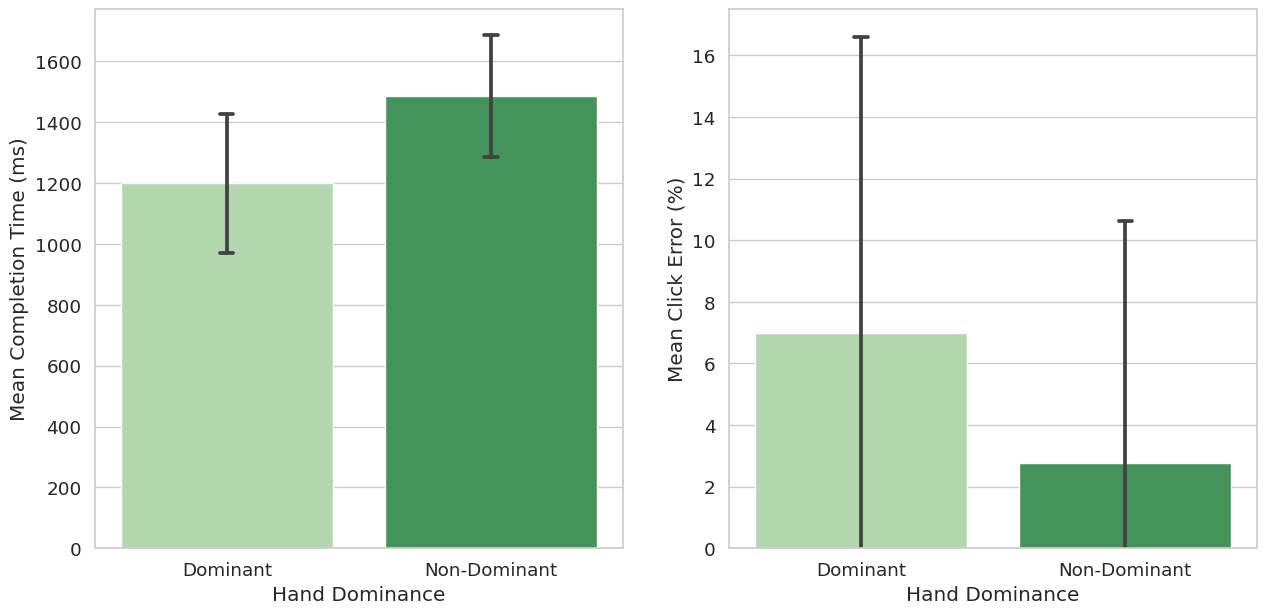

In [ ]:
# Visualizing the effect of hand dominance on mean completion time and mean click error

# Creating two subfigures
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Mean completion time by hand-dominance
sns.barplot(
    ax=axes[0],
    data=df,
    x='hand_dominance',
    y='mean_completion_time',
    errorbar='sd',
    capsize=.05,
    order=['Dominant', 'Non-Dominant'],
    palette='Greens'
)
axes[0].set_xlabel('Hand Dominance')
axes[0].set_ylabel('Mean Completion Time (ms)')

# Mean error rate by hand-dominance
plt.gca().set_ylim(bottom=0, top=17.5) # Hiding negative StD values
sns.barplot(
    ax=axes[1],
    data=df,
    x='hand_dominance',
    y='mean_click_error',
    errorbar='sd',
    capsize=.05,
    order=['Dominant', 'Non-Dominant'],
    palette='Greens'
)
axes[1].set_xlabel('Hand Dominance')
axes[1].set_ylabel('Mean Click Error (%)')

plt.show()

In [ ]:
print(df['number_of_targets'].unique())

[15.  7.]


In [ ]:
df_15 = df[df['number_of_targets'] == 15.0]
mean_completion_time = df_15['mean_completion_time'].mean()
mean_click_error = df_15['mean_click_error'].mean()

sd_completion_time = df_15['mean_completion_time'].std()
sd_click_error = df_15['mean_click_error'].std()

print('number of targets 15')
print('mean_completion_time', mean_completion_time, 'mean_click_error', mean_click_error)
print('sd_completion_time', sd_completion_time, 'sd_click_error', sd_click_error)

df_7 = df[df['number_of_targets'] == 7.0]
mean_completion_time = df_7['mean_completion_time'].mean()
mean_click_error = df_7['mean_click_error'].mean()

sd_completion_time = df_7['mean_completion_time'].std()
sd_click_error = df_7['mean_click_error'].std()

print('number of targets 7')
print('mean_completion_time', mean_completion_time, 'mean_click_error', mean_click_error)
print('sd_completion_time', sd_completion_time, 'sd_click_error', sd_click_error)

number of targets 15
mean_completion_time 1353.4922222225202 mean_click_error 5.0
sd_completion_time 253.0924086549176 sd_click_error 7.924767022894096
number of targets 7
mean_completion_time 1331.3255952376694 mean_click_error 4.761904761904762
sd_completion_time 267.6443395493029 sd_click_error 10.028058830900482


Text(0, 0.5, 'Mean Click Error (%)')

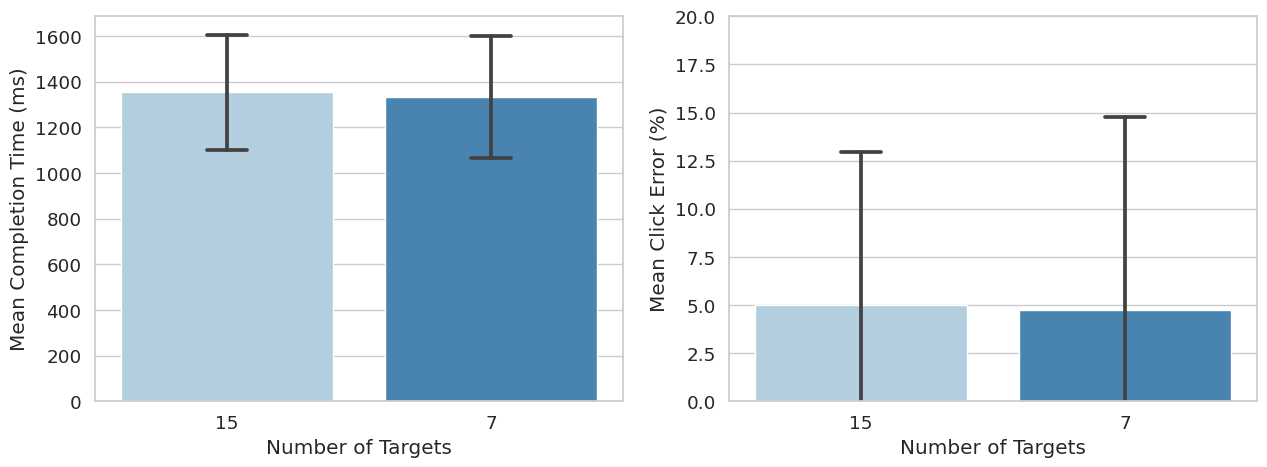

In [ ]:
# Visualizing the effect of Number of Targets on mean completion time and mean click error

# Creating two subfigures
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Mean completion time by Number of Targets
sns.barplot(
    ax=axes[0],
    data=df,
    x='number_of_targets',
    y='mean_completion_time',
    errorbar='sd',
    capsize=.15,
    order=[15, 7],
    palette='Blues'
)
axes[0].set_xlabel('Number of Targets')
axes[0].set_ylabel('Mean Completion Time (ms)')

# Mean error rate by Number of Targets
plt.gca().set_ylim(bottom=0, top=20) # Hiding negative StD values
sns.barplot(
    ax=axes[1],
    data=df,
    x='number_of_targets',
    y='mean_click_error',
    errorbar='sd',
    capsize=.15,
    order=[15, 7],
    palette='Blues'
)
axes[1].set_xlabel('Number of Targets')
axes[1].set_ylabel('Mean Click Error (%)')

#### **Two-Way ANOVA/TukeyHSD on Mean Completion Time**

In [16]:
# Two-way ANOVA for mean completion time
time_model = ols('mean_completion_time ~ C(hand_dominance) + C(number_of_targets) + C(hand_dominance):C(number_of_targets)', data=df).fit()
display(sm.stats.anova_lm(time_model, typ=2))


,sum_sq,df,F,PR(>F)
C(hand_dominance),9.890182e+05,1.0,20.414246,0.000046
C(number_of_targets),5.896312e+03,1.0,0.121705,0.728856
C(hand_dominance):C(number_of_targets),1.468967e+02,1.0,0.003032,0.956336
Residual,2.131688e+06,44.0,NaN,NaN


In [19]:
# TukeyHSD for mean completion time
tukey_hand = pairwise_tukeyhsd(endog=df['mean_completion_time'], groups=df['hand_dominance'], alpha=0.05)
tukey_session = pairwise_tukeyhsd(endog=df['mean_completion_time'], groups=df['number_of_targets'], alpha=0.05)
tukey_hand_session = pairwise_tukeyhsd(endog=df['mean_completion_time'], groups=df['hand_dominance'] + df['number_of_targets'].astype(int).astype(str), alpha=0.05)
print(tukey_hand)
print()
print(tukey_session)
print()
print(tukey_hand_session)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1     group2    meandiff p-adj  lower    upper   reject
-------------------------------------------------------------
Dominant Non-Dominant 287.0857   0.0 161.8211 412.3502   True
-------------------------------------------------------------

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
   7.0   15.0  22.1666 0.7695 -129.1854 173.5187  False
-------------------------------------------------------

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1         group2     meandiff p-adj    lower    upper   reject
-----------------------------------------------------------------------
    Dominant15      Dominant7 -18.6679 0.9968 -258.5909 221.2552  False
    Dominant15 Non-Dominant15 290.5844  0.012   50.6614 530.5075   True
    Dominant15  Non-Dominant7  264.919 0.0253   

#### **Two-Way ANOVA/TukeyHSD on Mean Click Error**

In [ ]:
# Two-way ANOVA for mean click error
error_model = ols('mean_click_error ~ C(hand_dominance) + C(number_of_targets) + C(hand_dominance):C(number_of_targets)', data=df).fit()
display(sm.stats.anova_lm(error_model, typ=2))

,sum_sq,df,F,PR(>F)
C(hand_dominance),212.320484,1.0,2.914175,0.094853
C(number_of_targets),0.680272,1.0,0.009337,0.923461
C(hand_dominance):C(number_of_targets),339.304611,1.0,4.657078,0.036424
Residual,3205.744520,44.0,NaN,NaN


In [ ]:
# TukeyHSD for mean click error
tukey_hand = pairwise_tukeyhsd(endog=df['mean_click_error'], groups=df['hand_dominance'], alpha=0.05)
tukey_session = pairwise_tukeyhsd(endog=df['mean_click_error'], groups=df['number_of_targets'], alpha=0.05)
tukey_hand_session = pairwise_tukeyhsd(endog=df['mean_click_error'], groups=df['hand_dominance'] + df['number_of_targets'].astype(int).astype(str), alpha=0.05)
print(tukey_hand)
print()
print(tukey_session)
print()
print(tukey_hand_session)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1     group2    meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
Dominant Non-Dominant  -4.2063 0.1038 -9.3079 0.8952  False
-----------------------------------------------------------

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   7.0   15.0   0.2381 0.9277 -5.0135 5.4897  False
---------------------------------------------------

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------
    Dominant15      Dominant7   5.0794 0.4713  -4.2247 14.3835  False
    Dominant15 Non-Dominant15   1.1111 0.9886   -8.193 10.4152  False
    Dominant15  Non-Dominant7  -4.4444 0.5832 -13.7486  4.8597  False
     Dominant7 Non